In [44]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
df = pd.read_csv("C://Users//User//Documents//BioUrjia_Data.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1/2/1990,353.40,359.69,351.98,359.69,359.69,162000000.0,NaN,NaN,NaN,NaN
1,1/3/1990,359.69,360.59,357.89,358.76,358.76,192000000.0,NaN,NaN,NaN,NaN
2,1/4/1990,358.76,358.76,352.89,355.67,355.67,177000000.0,NaN,NaN,NaN,NaN
3,1/5/1990,355.67,355.67,351.35,352.20,352.20,159000000.0,NaN,NaN,NaN,NaN
4,1/8/1990,352.20,354.24,350.54,353.79,353.79,140000000.0,NaN,NaN,NaN,NaN
5,1/9/1990,353.83,354.17,349.61,349.62,349.62,155000000.0,NaN,NaN,NaN,NaN
6,1/10/1990,349.62,349.62,344.32,347.31,347.31,176000000.0,NaN,NaN,NaN,NaN
7,1/11/1990,347.31,350.14,347.31,348.53,348.53,154000000.0,NaN,NaN,NaN,NaN
8,1/12/1990,348.53,348.53,339.49,339.93,339.93,184000000.0,NaN,NaN,NaN,NaN
9,1/15/1990,339.93,339.94,336.57,337.00,337.00,141000000.0,NaN,NaN,NaN,NaN


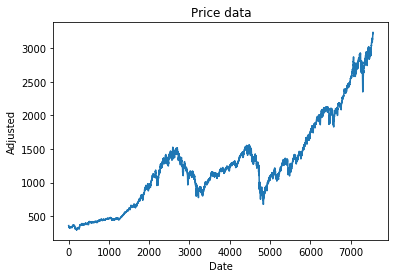

In [46]:
df['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Price data")
plt.show()

In [47]:
# Convert to datetime index
#range = pd.date_range('1990-01-01','2019-12-30')
#df = pd.DataFrame(index = range)
#df.index = pd.to_datetime(df.index, unit='d')
#df.set_index('Date', inplace=True)
#df.info()
df = pd.read_csv('C://Users//User//Documents//BioUrjia_Data.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
Date,,,,,,,,,,
1990-01-02,353.40,359.69,351.98,359.69,359.69,162000000.0,NaN,NaN,NaN,NaN
1990-01-03,359.69,360.59,357.89,358.76,358.76,192000000.0,NaN,NaN,NaN,NaN
1990-01-04,358.76,358.76,352.89,355.67,355.67,177000000.0,NaN,NaN,NaN,NaN
1990-01-05,355.67,355.67,351.35,352.20,352.20,159000000.0,NaN,NaN,NaN,NaN
1990-01-08,352.20,354.24,350.54,353.79,353.79,140000000.0,NaN,NaN,NaN,NaN


# Question 1 : Statistics

In [48]:
#calculate Total Return of Index
df2 = pd.read_csv('C://Users//User//Documents//BioUrjia_Data.csv')
# daily return:
df2['daily_return'] = df2['Adj Close'].pct_change()
# calculate cumluative return
df2['cumluative_return'] = np.exp(np.log1p(df2['daily_return']).cumsum())
print(df2['cumluative_return'].tail(1)*100)

7557    895.573966
Name: cumluative_return, dtype: float64


In [49]:
#wrong way of doing it but attempt
port_ret = df2['daily_return'].sum(axis=0)
cumulative_ret = (port_ret + 1).cumprod()
print(cumulative_ret*100)

[364.81664056]


In [50]:
df_daily_returns = df['Adj Close'].pct_change()
#df_daily_returns.drop(df.index[:1], inplace=True)
print(df_daily_returns.head(10))

#or
# df['simple_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
# print(df['simple_return'])

Date
1990-01-02         NaN
1990-01-03   -0.002586
1990-01-04   -0.008613
1990-01-05   -0.009756
1990-01-08    0.004514
1990-01-09   -0.011787
1990-01-10   -0.006607
1990-01-11    0.003513
1990-01-12   -0.024675
1990-01-15   -0.008619
Name: Adj Close, dtype: float64


In [51]:
df_monthly_returns = df['Adj Close'].resample('M').ffill().pct_change()
df_monthly_returns.drop(df_monthly_returns.index[:1], inplace=True)
print(df_monthly_returns)

Date
1990-02-28    0.008539
1990-03-31    0.024255
1990-04-30   -0.026887
1990-05-31    0.091989
1990-06-30   -0.008886
1990-07-31   -0.005223
1990-08-31   -0.094314
1990-09-30   -0.051184
1990-10-31   -0.006698
1990-11-30    0.059934
1990-12-31    0.024828
1991-01-31    0.041518
1991-02-28    0.067281
1991-03-31    0.022203
1991-04-30    0.000320
1991-05-31    0.038605
1991-06-30   -0.047893
1991-07-31    0.044859
1991-08-31    0.019649
1991-09-30   -0.019144
1991-10-31    0.011834
1991-11-30   -0.043904
1991-12-31    0.111588
1992-01-31   -0.019924
1992-02-29    0.009590
1992-03-31   -0.021832
1992-04-30    0.027893
1992-05-31    0.000964
1992-06-30   -0.017359
1992-07-31    0.039374
                ...   
2017-07-31    0.019349
2017-08-31    0.000546
2017-09-30    0.019303
2017-10-31    0.022188
2017-11-30    0.028083
2017-12-31    0.009832
2018-01-31    0.056179
2018-02-28   -0.038947
2018-03-31   -0.026885
2018-04-30    0.002719
2018-05-31    0.021608
2018-06-30    0.004842
2018-0

In [52]:
df_yearly_returns = df['Adj Close'].resample('AS').ffill().pct_change()
df_yearly_returns.drop(df_yearly_returns.index[:0], inplace=True)
print(df_yearly_returns)

Date
1990-01-01         NaN
1991-01-01         NaN
1992-01-01    0.263067
1993-01-01    0.044643
1994-01-01    0.070552
1995-01-01   -0.015393
1996-01-01    0.341107
1997-01-01    0.202637
1998-01-01    0.310082
1999-01-01    0.266686
2000-01-01    0.195260
2001-01-01   -0.101392
2002-01-01   -0.130427
2003-01-01   -0.233660
2004-01-01    0.263804
2005-01-01    0.089935
2006-01-01    0.030010
2007-01-01    0.136194
2008-01-01    0.035296
2009-01-01   -0.384858
2010-01-01    0.234542
2011-01-01    0.127827
2012-01-01   -0.000032
2013-01-01    0.134057
2014-01-01    0.296012
2015-01-01    0.113906
2016-01-01   -0.007266
2017-01-01    0.095350
2018-01-01    0.194200
2019-01-01   -0.062373
Freq: AS-JAN, Name: Adj Close, dtype: float64


In [53]:
#cagr
start_value = float(df2['Adj Close'].iloc[0])
end_value = float(df2['Adj Close'].iloc[-1])
num_periods = len(df2['Adj Close'])

def cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1
result = cagr(start_value, end_value, num_periods)
print("{:.2%}".format(result))


0.03%


# Question2 Binary classification 

In [54]:

# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [55]:
dfm = df_monthly_returns
dfm.head()

Date
1990-02-28    0.008539
1990-03-31    0.024255
1990-04-30   -0.026887
1990-05-31    0.091989
1990-06-30   -0.008886
Freq: M, Name: Adj Close, dtype: float64

In [56]:
dfm.to_csv('C://Users//User//Documents//BioUrjia_Data_M.csv')
##had to manually add COlumn names
#dfmm = pd.read_csv("C://Users//User//Documents//BioUrjia_Data_MM.csv", index_col='Date', parse_dates=['Date'])
dfmm = pd.read_csv("C://Users//User//Documents//BioUrjia_Data_MM.csv")
dfmm.tail(10)


,Date,Return
349,3/31/2019 0:00,0.017924
350,4/30/2019 0:00,0.039313
351,5/31/2019 0:00,-0.065778
352,6/30/2019 0:00,0.068930
353,7/31/2019 0:00,0.013128
354,8/31/2019 0:00,-0.018092
355,9/30/2019 0:00,0.017181
356,10/31/2019 0:00,0.020432
357,11/30/2019 0:00,0.034047
358,12/31/2019 0:00,0.025568


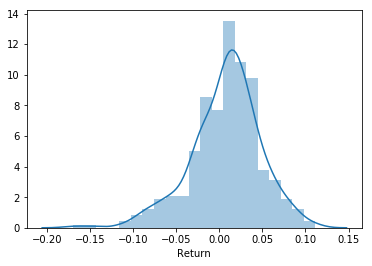

In [57]:
#analyze segments for "very Bullish" "Bullish" "Bearish" "VeryBearish"

# Segment tx_price by property_type and plot distributions
x = dfmm['Return']
sns.distplot(x)

In [58]:
#Create Class Features
dfmm['bullish'] = ((dfmm['Return'] > 0.00).astype(int))
dfmm['bearish'] = ((dfmm['Return'] <= 0.00).astype(int))
dfmm.head(10)

,Date,Return,bullish,bearish
0,2/28/1990 0:00,0.008539,1,0
1,3/31/1990 0:00,0.024255,1,0
2,4/30/1990 0:00,-0.026887,0,1
3,5/31/1990 0:00,0.091989,1,0
4,6/30/1990 0:00,-0.008886,0,1
5,7/31/1990 0:00,-0.005223,0,1
6,8/31/1990 0:00,-0.094314,0,1
7,9/30/1990 0:00,-0.051184,0,1
8,10/31/1990 0:00,-0.006698,0,1
9,11/30/1990 0:00,0.059934,1,0


In [69]:
dfmm.sum(axis=0) 

Date           2/28/1990 0:003/31/1990 0:004/30/1990 0:005/31...
Return                                                   2.59077
bullish                                                      231
bearish                                                      128
Strong Bull                                                  109
Weak Bull                                                    108
Weak Bear                                                     20
dtype: object

Since its a Binary variable a Logistic Regression would probably be the best classifer for this initial task

# Question 3 Multiclass Classification

In [59]:
# Create More classes : using distribution statitics
# percentile list 
perc =[.30, .40, .60, .70]
include =['object', 'float', 'int'] 
desc = dfmm.describe(percentiles= perc, include=include)
desc

,Date,Return,bullish,bearish
count,359,359.000000,359.000000,359.000000
unique,359,NaN,NaN,NaN
top,3/31/2004 0:00,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,0.007217,0.643454,0.356546
std,NaN,0.040830,0.479648,0.479648
min,NaN,-0.169425,0.000000,0.000000
30%,NaN,-0.008783,0.000000,0.000000
40%,NaN,0.004102,1.000000,0.000000
50%,NaN,0.011096,1.000000,0.000000


In [60]:
dfmm['Strong Bull'] = ((dfmm['Return'] > 0.027).astype(int))
dfmm['Weak Bull'] = ((dfmm['Return'] < 0.027) & (dfmm['Return'] > 0)).astype(int)
dfmm['Weak Bear'] = ((dfmm['Return'] < 0) & (dfmm['Return'] > -0.0087)).astype(int)
dfmm['Weak Bull'] = ((dfmm['Return'] < -0.0087).astype(int))

dfmm.head(50)


,Date,Return,bullish,bearish,Strong Bull,Weak Bull,Weak Bear
0,2/28/1990 0:00,0.008539,1,0,0,0,0
1,3/31/1990 0:00,0.024255,1,0,0,0,0
2,4/30/1990 0:00,-0.026887,0,1,0,1,0
3,5/31/1990 0:00,0.091989,1,0,1,0,0
4,6/30/1990 0:00,-0.008886,0,1,0,1,0
5,7/31/1990 0:00,-0.005223,0,1,0,0,1
6,8/31/1990 0:00,-0.094314,0,1,0,1,0
7,9/30/1990 0:00,-0.051184,0,1,0,1,0
8,10/31/1990 0:00,-0.006698,0,1,0,0,1
9,11/30/1990 0:00,0.059934,1,0,1,0,0


In [61]:
dfmm.sum(axis=0) 

Date           2/28/1990 0:003/31/1990 0:004/30/1990 0:005/31...
Return                                                   2.59077
bullish                                                      231
bearish                                                      128
Strong Bull                                                  109
Weak Bull                                                    108
Weak Bear                                                     20
dtype: object

multiclass classifiers: Not sure what classifer would be best until I run the results



sklearn.naive_bayes.BernoulliNB

sklearn.tree.DecisionTreeClassifier

sklearn.tree.ExtraTreeClassifier

sklearn.ensemble.ExtraTreesClassifier

sklearn.naive_bayes.GaussianNB

sklearn.neighbors.KNeighborsClassifier

sklearn.semi_supervised.LabelPropagation

sklearn.semi_supervised.LabelSpreading

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

sklearn.svm.LinearSVC (setting multi_class=”crammer_singer”)

sklearn.linear_model.LogisticRegression (setting multi_class=”multinomial”)

sklearn.linear_model.LogisticRegressionCV (setting multi_class=”multinomial”)

sklearn.neural_network.MLPClassifier

sklearn.neighbors.NearestCentroid

sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis

sklearn.neighbors.RadiusNeighborsClassifier

sklearn.ensemble.RandomForestClassifier

sklearn.linear_model.RidgeClassifier

sklearn.linear_model.RidgeClassifierCV

# Question 4 Anomoly Detection

Several times the market has large intraday movements. How can you use anomaly detection to
identify these movements?

Some methods of amoly detection could be
1. To idendify Outliers, Univariate Outliers or Mulivariate Outliers

Libraries
1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)an alternative to K-Means)
that clusters points together and identifies any points not belonging to a cluster as outliers. 
It’s like K-means, except the number of clusters does not need to be specified in advance.

2. Isolation Forests -separating an instance from the rest of the instances. In a data-induced random tree, 
partitioning of instances are repeated recursively until all instances are isolated.
The number of runs though isolation of the instances given the min max range, the lower these number
the more anomalyous the observation is.

3. Local Outlier Factor - LOF uses density-based outlier detection to identify local outliers, 
points that are outliers with respect to their local neighborhood, rather than with respect to 
the global data distribution. The higher the LOF value for an observation, the more anomalous the observation.

I could use all these individually or create a ensemble ranking system that 
uses a composite score of each approach together increase the predictive probability and reduce
curvefitting.

# Question 5: Neural Network

Wall Street traders often say, “Sell in May and go away” and “Christmas brings the Santa rally”.
Can you build a simple neural network with date, month, and previous month’s price movement
(% price move up or down) to predict whether the current month is likely to bullish or bearish?

In [62]:
import pandas as pd
import numpy as np
import datetime
dfmn = pd.read_csv("C://Users//User//Documents//BioUrjia_Data_MM.csv")
#dfmn = pd.read_csv("C://Users//User//Documents//BioUrjia_Data_MM.csv", index_col='Date', parse_dates=['Date'])
dfmn.tail(10)

,Date,Return
349,3/31/2019 0:00,0.017924
350,4/30/2019 0:00,0.039313
351,5/31/2019 0:00,-0.065778
352,6/30/2019 0:00,0.068930
353,7/31/2019 0:00,0.013128
354,8/31/2019 0:00,-0.018092
355,9/30/2019 0:00,0.017181
356,10/31/2019 0:00,0.020432
357,11/30/2019 0:00,0.034047
358,12/31/2019 0:00,0.025568


In [63]:
# Data Prep and Feature Engineering
dfmn['updown'] =((dfmm['Return'] > 0.00).astype(int))
dfmn['month'] = pd.DatetimeIndex(dfmn['Date']).month
dfmn['Prev_Month'] = dfmn['Return'].shift(+1)
dfmn['Prev_Month'].fillna(value=0, inplace=True)

#Model could not run w date as a input
dfmn.drop('Date', axis=1)
dfmn.head(20)

,Date,Return,updown,month,Prev_Month
0,2/28/1990 0:00,0.008539,1,2,0.000000
1,3/31/1990 0:00,0.024255,1,3,0.008539
2,4/30/1990 0:00,-0.026887,0,4,0.024255
3,5/31/1990 0:00,0.091989,1,5,-0.026887
4,6/30/1990 0:00,-0.008886,0,6,0.091989
5,7/31/1990 0:00,-0.005223,0,7,-0.008886
6,8/31/1990 0:00,-0.094314,0,8,-0.005223
7,9/30/1990 0:00,-0.051184,0,9,-0.094314
8,10/31/1990 0:00,-0.006698,0,10,-0.051184
9,11/30/1990 0:00,0.059934,1,11,-0.006698


In [64]:
# Function for splitting training and test set
# Create separate object for target variable
y = dfmn['updown']
# Create separate object for input features
#X = dfmn.drop('updown', axis=1).values
X= dfmn[['Return', 'month', 'Prev_Month']]

In [70]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver="sgd")
classifier.hidden_layer_sizes = (40,)  # Remember funny notation for tuple with single element
classifier.activation = "logistic"
classifier.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

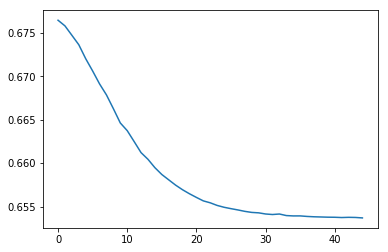

In [71]:
import matplotlib.pyplot as plt
plt.plot(classifier.loss_curve_)
plt.show()

In [72]:
#increase the learning rate
classifier.learning_rate_init = 1
classifier.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40,), learning_rate='constant',
              learning_rate_init=1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

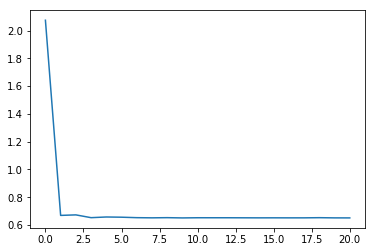

In [73]:
plt.plot(classifier.loss_curve_)
plt.show()
